<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/20250210_DecisiontreeRegressor_KNNRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 모델 초기화 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_scaled, y.ravel())

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X, y.ravel())

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y.ravel())

# 예측값 계산
y_predict_sgd = sgd_reg.predict(X_scaled)
y_predict_lin = lin_reg.predict(X)

y_predict_knn = knn_reg.predict(X)
y_predict_rf = rf_reg.predict(X)

# RMS 계산
rms_sgd = np.sqrt(mean_squared_error(y, y_predict_sgd))
rms_lin = np.sqrt(mean_squared_error(y, y_predict_lin))
rms_knn = np.sqrt(mean_squared_error(y, y_predict_knn))
rms_rf = np.sqrt(mean_squared_error(y, y_predict_rf))

# 절편과 기울기
sgd_intercept, sgd_coef = sgd_reg.intercept_[0], sgd_reg.coef_[0]
lin_intercept, lin_coef = lin_reg.intercept_[0], lin_reg.coef_[0]

# 각 모델의 절편, 기울기, RMS를 데이터프레임으로 생성
parameters = {
    'Algorithm': ['SGD Regressor', 'Linear Regression', 'KNN Regressor', 'Random Forest Regressor'],
    'Intercept': [sgd_intercept, lin_intercept, None, None],
    'Coefficient': [sgd_coef, lin_coef, None, None],
    'RMS': [rms_sgd, rms_lin, rms_knn, rms_rf]
}

df_parameters = pd.DataFrame(parameters)
df_parameters

,Algorithm,Intercept,Coefficient,RMS
0,SGD Regressor,6.865100,1.655256,0.899363
1,Linear Regression,4.215096,[2.7701133864384837],0.898101
2,KNN Regressor,NaN,None,0.807365
3,Random Forest Regressor,NaN,None,0.391284


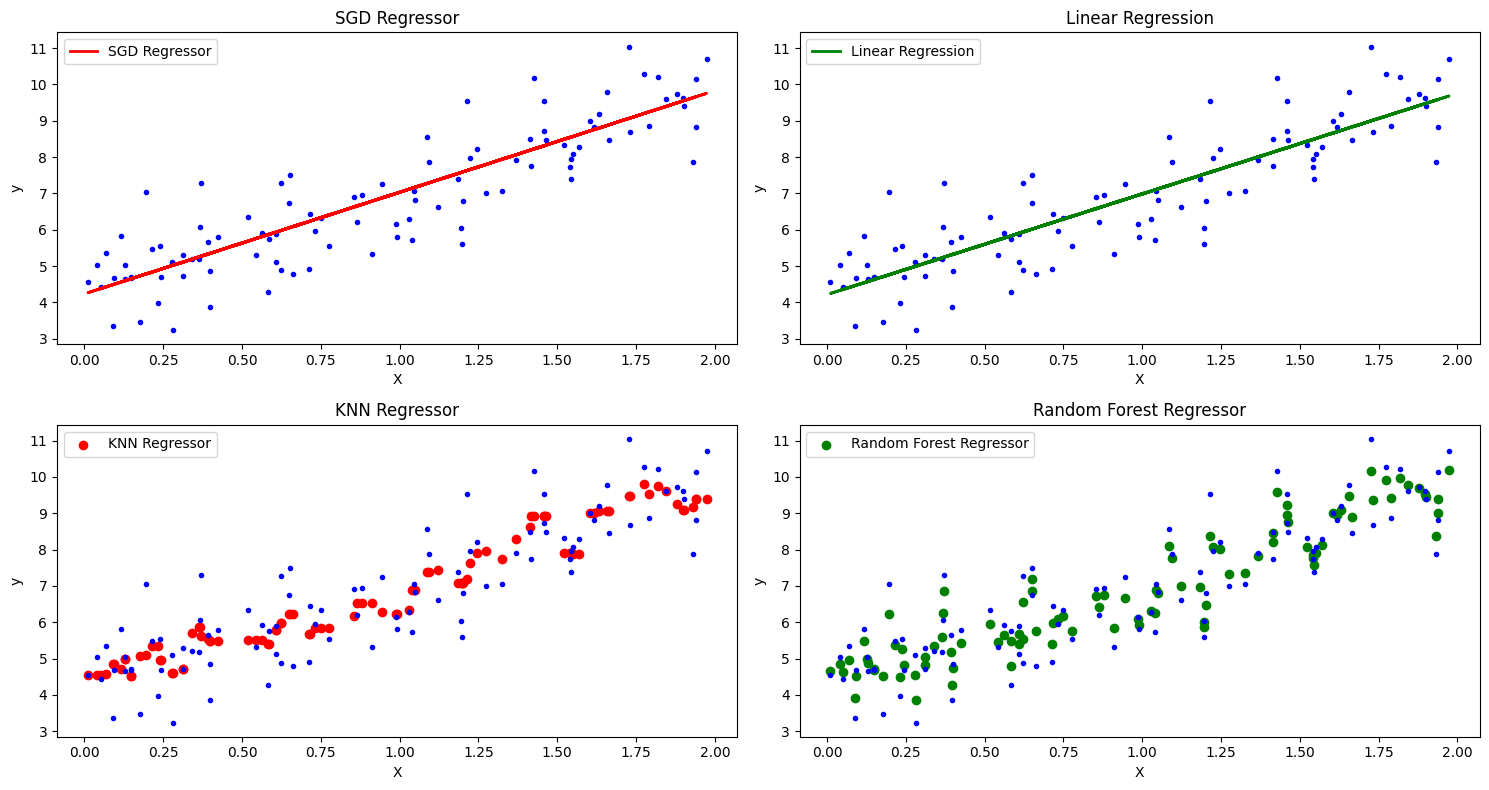

In [2]:
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# SGD Regressor 그래프
axes[0, 0].plot(X, y, "b.")
axes[0, 0].plot(X, y_predict_sgd, "r-", linewidth=2, label="SGD Regressor")
axes[0, 0].set_title("SGD Regressor")
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("y")
axes[0, 0].legend()

# Linear Regression 그래프
axes[0, 1].plot(X, y, "b.")
axes[0, 1].plot(X, y_predict_lin, "g-", linewidth=2, label="Linear Regression")
axes[0, 1].set_title("Linear Regression")
axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("y")
axes[0, 1].legend()

# KNN Regressor 그래프
axes[1, 0].plot(X, y, "b.")
axes[1, 0].scatter(X, y_predict_knn, color="red", label="KNN Regressor")
axes[1, 0].set_title("KNN Regressor")
axes[1, 0].set_xlabel("X")
axes[1, 0].set_ylabel("y")
axes[1, 0].legend()

# Random Forest Regressor 그래프
axes[1, 1].plot(X, y, "b.")
axes[1, 1].scatter(X, y_predict_rf, color="green", label="Random Forest Regressor")
axes[1, 1].set_title("Random Forest Regressor")
axes[1, 1].set_xlabel("X")
axes[1, 1].set_ylabel("y")
axes[1, 1].legend()

plt.tight_layout()
plt.show()